# London: Demographic Custering vs Clustering by Venues

#### GitHub location: https://github.com/tbertoglia-ds/Coursera_Capstone/blob/master/London%20UK%20Boroughs%20Clustering%202.ipynb

### The Business Problem:
RightPlacer Inc. is a young Consulting Firm, specialized in helping investors setting up their business in the best location according to their needs.<br />
A team of Business consultants from RightPlacer Inc. has been requested to advise Mr. Johnson, an important client interested in setting-up an exclusive chain of Coffee Shops in London.<br />
Particularly, Mr. Johnson would like to know in which Boroughs should he place his Coffee Shops. <br /><br />
Yet, the task is not that simple as he is pursuing two objectives simultaneously: guarantee business success of his chain and create a strong Brand, Top-of-mind within the high-end segment of customers.<br />
He claims that even though he wants to have a profitable business, he is also very concerned about building a strong brand reputation and having their coffee shops regarded as an exclusive product. An asset that has been proven very valuable in the long run.<br />
<br />
The three consultants are having problems reaching a consensus:<br />
-One of them suggests a demographic segmentation to focus on upscale neighborhoods with similar characteristics between them.<br />
-The second one proposes that they would do much better implementing segmentation by venues, to locate the coffee shops in those neighborhoods where people most often go for a Coffee.<br />
-The third one claims that any of these segmenting modalities would lead to a similar result and is indifferent to any of them.<br />
<br />
Finally, they agree to join efforts and try different strategies to analyze their results. <br />
How should they proceed? How could they conciliate their approaches to fulfill Mr. Johnson's requirements?<br />
<br />

### The Data
Since the team of Business consultants agreed to try different strategies, we will use 3 sources of data: <br />
<br />
<b>a) Borroughs & Coordinates: <br /></b>
We will start by creating a base dataset containing the different borroughs of London, along with their geographic coordinates.<br />
To do this, we will scrap the corresponding website from Wikipedia using the <i>BeautifulSoup</i> package and prepare the data according to the format needed for this dataset.<br />
This dataset will be later used in the Clustering phase for the geographic location of the different Boroughs.<br />
This means, we will have to make sure that the format of the coordinates is set as <i>Float</i>, in order to be properly parsed by the <i>folium</i> package.

<br />
The final dataset should have this format:<br />


In [207]:
df.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


Datasource url: 'https://en.wikipedia.org/wiki/List_of_London_boroughs' <br />
<br />

<b> b) Demographic Clustering: <br /></b>
Next, we will need to prepare a dataset appropriate to the clustering based on demographic profiling of London's boroughs.<br />
For this purpose, we will download a csv file from the official source (Greater London Authority (GLA)) and select the demographic features we will use for this clustering. <br />
The goal of this phase is to identify the Boroughs's clusters that better fit with the customer's profile that Mr. Johnson is trying to target. <br />
<br />
From the 81 available features available in the source, we will choose the following as the most relevant for the demographic clustering required by our Stakeholder:<br />
<br />
<b>-Population: </b>GLA_Population_Estimate_2017	<br />
<b>-Population Density: </b>Population_density_(per_hectare)_2017	<br />
<b>-Average Age: </b>Average_Age,_2017	<br />
<b>-Employment Rate (%): </b>Employment_rate_(%)_(2015)	<br />
<b>-Crime Rate: </b>Crime_rates_per_thousand_population_2014/15	<br />
<b>-House Price: </b>Median_House_Price,_2015	<br />
<b>-Median Income: </b>Modelled_Household_median_income_estimates_2012/13 <br />
<br />
The dataset should look like this:<br />


In [322]:
df_dem_top.head()

,Borough,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


As we are working with Features of different dimensions, the <i>StandardScaler</i> package will be used to normalize the data prior to the Clustering phase<br />

Datasource url: 'https://data.london.gov.uk/dataset/london-borough-profiles' <br />
 <br />

<b> c) Clustering by Venues: <br /></b>
In this section we will use the API of Foursquare, particularly the <i>Explore Endpoint</i> and prepare a parallel clustering. <br />
This time, based on the venue's configuration and their relevance in the different boroughs of London. <br />
The idea is to cluster the different Borroughs in regard to the Venues that are more often found in each of them. <br />
Ultimately, our intention here is to focus on Boroughs were customers normally go when looking for a Coffee Shop, as to guarantee the business success challenge presented by the Stakeholder.<br />
This means, we will put special attention to these Boroughs with high concetration of <i>Cafés</i> or <i>Coffee Shops</i>. <br />
<br />Our Goal is to create a dataset like this:<br />

In [209]:
london_grouped.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.142857,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.142857,0.000000,0.0,0.0,0.000000,0.00

Datasource url (API): 'https://api.foursquare.com/v2/venues/explore' <br />
<br />

#      
#      
# //////////////////////////////    Borrougs & Coordinates Dataset    //////////////////////////////
#      
#      

### 1. Import necessary Libraries

In [210]:
# Import Libraries

!pip install geopy

!pip install folium

!pip install geocoder

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib.request

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### 2. Download and Explore Demographic Data

In [211]:
#Specify URL
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'

In [212]:
#Open the url
page = urllib.request.urlopen(url).read().decode('utf-8-sig', errors="replace")

In [213]:
#Parse the HTML from our URL
soup = BeautifulSoup(page,'lxml')

In [214]:
#Explore Tables
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable" style="font-size:100%" width="100%">
 <tbody><tr>
 <th>Borough
 </th>
 <th>Inner
 </th>
 <th>Status
 </th>
 <th>Local authority
 </th>
 <th>Political control
 </th>
 <th>Headquarters
 </th>
 <th>Area (sq mi)
 </th>
 <th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </th>
 <th>Co-ordinates
 </th>
 <th><span style="background:#67BCD3"> Nr. in map </span>
 </th></tr>
 <tr>
 <td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
 </td>
 <td>
 </td>
 <td>
 </td>
 <td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
 </td>
 <td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
 </td>
 <td><a href="/wiki/Barking_Town_Hall" 

In [215]:
#Explore 'wikitable sortable'
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Hal

### 3. Arrange and create Dataset

In [216]:
# Loop through the rows
A=[]
B=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) > 0:
        A.append(cells[0].text.strip())
        B.append(cells[8].text.strip()) 
   

In [217]:
#Create Dataframe
df_pre=pd.DataFrame(A,columns=['Borough'])
df_pre['Co-ordinates']=B
print(df_pre.shape)
df_pre.head()

(32, 2)


,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


### 4. After checkig the data, I decided to extract all location & Neighborhood data from third column
#### I will create 3 strings and will join them afterwards in an new dataset.

In [218]:
s = df_pre['Co-ordinates'].str.split(" / ", expand=True)
s.head()

,0,1,2
0,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [219]:
s2 = s[2]
s2.head()

0    51.5607; 0.1557﻿ (Barking and Dagenham)
1                 51.6252; -0.1517﻿ (Barnet)
2                  51.4549; 0.1505﻿ (Bexley)
3                  51.5588; -0.2817﻿ (Brent)
4                 51.4039; 0.0198﻿ (Bromley)
Name: 2, dtype: object

In [220]:
s3 = s2.str.split("; ", expand=True)
s3.head()

,0,1
0,51.5607,0.1557﻿ (Barking and Dagenham)
1,51.6252,-0.1517﻿ (Barnet)
2,51.4549,0.1505﻿ (Bexley)
3,51.5588,-0.2817﻿ (Brent)
4,51.4039,0.0198﻿ (Bromley)


#### Latitude ready

In [221]:
lat = s3[0]
lat = lat.apply(pd.to_numeric, errors='coerce')
lat.head()

0    51.5607
1    51.6252
2    51.4549
3    51.5588
4    51.4039
Name: 0, dtype: float64

In [222]:
s4 = s3[1].str.split('(', expand=True)
s4.head()

,0,1
0,0.1557﻿,Barking and Dagenham)
1,-0.1517﻿,Barnet)
2,0.1505﻿,Bexley)
3,-0.2817﻿,Brent)
4,0.0198﻿,Bromley)


In [223]:
s4_pre = s4[0]
s4_pre.head()

0     0.1557﻿ 
1    -0.1517﻿ 
2     0.1505﻿ 
3    -0.2817﻿ 
4     0.0198﻿ 
Name: 0, dtype: object

In [224]:
s4_pre2 =  s4_pre.str.split('\ufeff', expand=True)
s4_pre2.head()

,0,1
0,0.1557,
1,-0.1517,
2,0.1505,
3,-0.2817,
4,0.0198,


In [225]:
lon = s4_pre2[0]
lon.head()

0     0.1557
1    -0.1517
2     0.1505
3    -0.2817
4     0.0198
Name: 0, dtype: object

#### Longitude ready

In [226]:
lon = lon.apply(pd.to_numeric, errors='coerce')
lon.head()

0    0.1557
1   -0.1517
2    0.1505
3   -0.2817
4    0.0198
Name: 0, dtype: float64

In [227]:
s5 = s4[1]
s5.head()

0    Barking and Dagenham)
1                  Barnet)
2                  Bexley)
3                   Brent)
4                 Bromley)
Name: 1, dtype: object

In [228]:
#Since strings are immutables, we separate the column with the "("
s6 = s5.str.split(")", expand=True)
s6.head()

,0,1
0,Barking and Dagenham,
1,Barnet,
2,Bexley,
3,Brent,
4,Bromley,


#### Borrough ready

In [229]:
bor = s6[0]
bor.head()

0    Barking and Dagenham
1                  Barnet
2                  Bexley
3                   Brent
4                 Bromley
Name: 0, dtype: object

### 5. Let's create our Borrough & Location Dataframe

In [230]:
df = pd.DataFrame() 

In [231]:
df['Borough'] = bor

In [232]:
df['Latitude'] = lat

In [233]:
df['Longitude'] = lon

In [234]:
print(df.shape)
df.head()

(32, 3)


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [235]:
#Trim Dataset

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [236]:
print(df.shape)
print(df.dtypes)
df.head()

(32, 3)
Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


#      
#      
# ///////////////////////////////     Demographic Clustering     //////////////////////////////
#      
#      

### 6. Now we collect demographic data from the official source

In [313]:
#https://data.london.gov.uk/dataset/london-borough-profiles
df_dem_pre = pd.read_csv('https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv', header = 0, encoding= 'unicode_escape')
df_dem_pre.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(£),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"£63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.2,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,

#### Now I will create a subset with the Key Deographic Features I wwant to use for clustering

In [314]:
df_dem = df_dem_pre.iloc[1:33,[1, 3, 6, 7, 28, 48, 51, 41]]  
df_dem.head()

,Area_name,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


In [315]:
#Trim Dataset

df_dem = df_dem.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [317]:
df_dem.rename(columns={'Area_name': 'Borough', 
                       'GLA_Population_Estimate_2017': 'Population',
                       'Population_density_(per_hectare)_2017': 'Population Density',
                       'Average_Age,_2017': 'Average Age',
                       'Employment_rate_(%)_(2015)': 'Employment Rate (%)',
                       'Crime_rates_per_thousand_population_2014/15': 'Crime Rate',
                       'Median_House_Price,_2015': 'House Price',
                       'Modelled_Household_median_income_estimates_2012/13': 'Median Income'}, inplace=True)
df_dem_top = df_dem
print(df_dem.shape)
df_dem.head()

(32, 8)


,Borough,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 7. Clean & prepare Dataset

Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [320]:
df_dem_clusterset_pre = df_dem.drop('Borough', 1)
df_dem_clusterset_pre.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


#### Format and add 'Modelled_Household_median_income_estimates_2012/13'

In [321]:
df_incc = df_dem_clusterset_pre['Median Income']
df_incc = df_incc.str.split("£", expand=True)
df_incc = df_incc.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_incc = df_incc[1]
#df_incc = df_incc.str.split(",", expand=True)
df_incc = df_incc.str.split(",", expand=True)
df_incc[2] =  df_incc[0] + df_incc[1]
df_incc = df_incc[2]
df_incc = df_incc.apply(pd.to_numeric, errors='coerce')
df_incc

1     29420
2     40530
3     36990
4     32140
5     43060
6     43750
7     37000
8     36070
9     33110
10    35350
11    35140
12    43820
13    35420
14    38880
15    36670
16    37040
17    35330
18    39790
19    55620
20    43940
21    38490
22    35900
23    41960
24    28780
25    36860
26    53470
27    37100
28    39940
29    34930
30    33080
31    47480
32    47510
Name: 2, dtype: int64

In [323]:
df_dem_clusterset_pre['Median Income'] = df_incc
df_dem_clusterset_pre.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,209000,57.9,32.9,65.8,83.4,243500,29420
2,389600,44.9,37.3,68.5,62.7,445000,40530
3,244300,40.3,39.0,75.1,51.8,275000,36990
4,332100,76.8,35.6,69.5,78.8,407250,32140
5,327900,21.8,40.2,75.3,64.1,374975,43060


### 8. Analyze Correlations

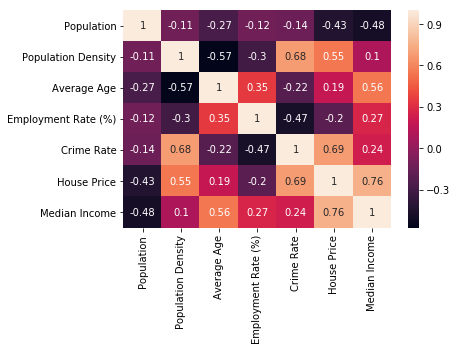

In [324]:
import seaborn as sn
import matplotlib.pyplot as plt
df_dem_clusterset_numeric = df_dem_clusterset_pre.apply(pd.to_numeric, errors='coerce')
corrMatrix = df_dem_clusterset_numeric.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### There seems to be a high correlation between Median_House_Price,_2015 and 3 other Features, the Feature will be excluded and the resulting Dataset tested again for correlations.

In [325]:
df_dem_clusterset_pre2 = df_dem_clusterset_pre.loc[:,df_dem_clusterset_pre.columns[[0,1,2,3,4,6]]]
df_dem_clusterset_pre2.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,Median Income
1,209000,57.9,32.9,65.8,83.4,29420
2,389600,44.9,37.3,68.5,62.7,40530
3,244300,40.3,39.0,75.1,51.8,36990
4,332100,76.8,35.6,69.5,78.8,32140
5,327900,21.8,40.2,75.3,64.1,43060


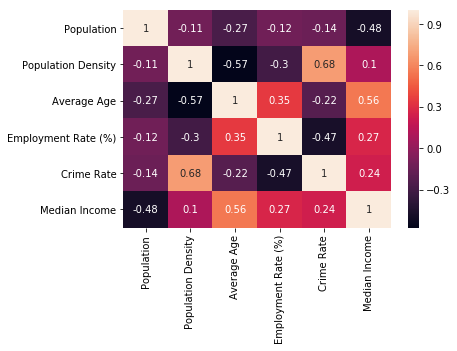

In [326]:
import seaborn as sn
import matplotlib.pyplot as plt
df_dem_clusterset_numeric = df_dem_clusterset_pre2.apply(pd.to_numeric, errors='coerce')
corrMatrix = df_dem_clusterset_numeric.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### The new dataset seems much more consistent with only 1 big corelation between 2 of their variables. We will keep it as it is for now.

### 9. Normalize Dataset for Clustering

In [327]:
from sklearn.preprocessing import StandardScaler

X = df_dem_clusterset_pre2.values[:,1:]
X = np.nan_to_num(X)
df_dem_clusterset = StandardScaler().fit_transform(X)
df_dem_clusterset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.65378203e-01, -1.50670843e+00, -1.81033090e+00,
        -4.79371558e-02, -1.57543787e+00],
       [-8.02303598e-01,  5.25327460e-01, -1.12849747e+00,
        -7.23545071e-01,  2.72283146e-01],
       [-9.21523354e-01,  1.31043224e+00,  5.38206484e-01,
        -1.07929996e+00, -3.16459644e-01],
       [ 2.44594879e-02, -2.59777316e-01, -8.75966564e-01,
        -1.98072248e-01, -1.12307053e+00],
       [-1.40099411e+00,  1.86462384e+00,  5.88712664e-01,
        -6.77851782e-01,  6.93051299e-01],
       [ 9.18607653e-01,  1.09683755e-01, -9.51725835e-01,
         1.26084919e+00,  8.07806249e-01],
       [-8.07487066e-01,  3.86779559e-01,  6.13965754e-01,
        -2.56820762e-01, -3.14796529e-01],
       [-3.25424577e-01,  1.73184877e-02, -6.78676798e-02,
        -3.05777858e-01, -4.69466245e-01],
       [-8.98197749e-01,  6.35011216e-02,  7.89159067e-03,
        -5.04870045e-01, -9.61748352e-01],
       [-4.31685663e-01, -5.36873119e-01, -2.19386221e-01,
        -1.78489410e-01

### 10. We proceed clustering the Boroughs according to their Demographic charcteristics

In [138]:
# set number of clusters
kclusters = 5

#df_dem_clustering = df_dem.drop('Borough', 1)

# run k-means clustering
kmeans_dem = KMeans(n_clusters=kclusters, random_state=0).fit(df_dem_clusterset)

# check cluster labels generated for each row in the dataframe
kmeans_dem.labels_[0:10] 

array([2, 1, 3, 1, 3, 0, 1, 1, 1, 1], dtype=int32)

### 11. Now we join the Location with the Demographic Dataset

In [139]:
# add clustering labels
df_dem.insert(0, 'Cluster Labels', kmeans_dem.labels_)

london_merged = df

london_merged.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [140]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(df_dem.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
0,Barking and Dagenham,51.5607,0.1557,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
1,Barnet,51.6252,-0.1517,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
2,Bexley,51.4549,0.1505,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
3,Brent,51.5588,-0.2817,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
4,Bromley,51.4039,0.0198,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 12. We are now ready to map the demographic's clustering result

In [141]:
address = 'London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [142]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [143]:
# create map of London & Clustered Neighborhoods
import folium
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 13. Examine Clusters

In [144]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
5,Camden,0,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,0,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,0,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
20,Lambeth,0,328900,122.7,34.5,78.5,104.6,450000,"£38,490"
26,Southwark,0,314300,108.9,34.4,74.2,100.6,475000,"£37,100"
30,Wandsworth,0,321000,93.7,35.0,78.8,72.6,557000,"£47,480"


In [145]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barnet,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Brent,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
6,Croydon,1,386500,44.7,37.0,75.4,77,300000,"£37,000"
7,Ealing,1,351600,63.3,36.2,72.7,75.5,430000,"£36,070"
8,Enfield,1,333000,41.2,36.3,73.0,69.4,320000,"£33,110"
9,Greenwich,1,280100,59.2,35.0,72.1,79.4,340000,"£35,350"
12,Haringey,1,278000,93.9,35.1,71.3,90.2,432500,"£35,420"
15,Hillingdon,1,301000,26,36.4,73.2,76.6,350000,"£37,040"
16,Hounslow,1,274200,49,35.8,74.2,79.2,355000,"£35,330"
21,Lewisham,1,303400,86.3,35.0,75.9,77,352000,"£35,900"


In [146]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
0,Barking and Dagenham,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
10,Hackney,2,274300,144,33.1,69.0,99.6,485000,"£35,140"
23,Newham,2,342900,94.7,32.1,66.2,90.8,305000,"£28,780"
28,Tower Hamlets,2,304000,153.7,31.4,70.4,99.9,415000,"£34,930"


In [147]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
2,Bexley,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Bromley,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"
13,Harrow,3,252300,50,38.3,73.9,50.4,396150,"£38,880"
14,Havering,3,254300,22.6,40.3,76.5,62.9,287500,"£36,670"
19,Kingston upon Thames,3,175400,47.1,37.1,74.4,58.5,410000,"£43,940"
22,Merton,3,208100,55.3,36.7,78.8,59.7,415000,"£41,960"
25,Richmond upon Thames,3,197300,34.4,38.8,79.6,56.3,575000,"£53,470"
27,Sutton,3,202600,46.2,38.9,78.2,55.9,320000,"£39,940"


In [148]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
18,Kensington and Chelsea,4,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
31,Westminster,4,242100,112.7,37.7,65.6,212.4,920000,"£47,510"


#### The clusters 0 & 4 seem idoneous to fulfill the objectives of the stakeholder in terms of customer profile.

#      
#      
# //////////////////////////////     Clustering by Venues    //////////////////////////////
#      
#      

### 12. Foursquare Keys

In [149]:
# The code was removed by Watson Studio for sharing.

### 13. Explore London's Neighborhoods

In [150]:
radius = 500
LIMIT = 100

In [151]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [189]:
# type your answer here

london_venues = getNearbyVenues(names=london_merged['Borough'],
                                   latitudes=london_merged['Latitude'],
                                   longitudes=london_merged['Longitude']
                               )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [192]:
print(london_venues.shape)
london_venues.head()

(1433, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


In [193]:
london_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Barnet,3,3,3,3,3,3
Bexley,29,29,29,29,29,29
Brent,74,74,74,74,74,74
Bromley,39,39,39,39,39,39
Camden,72,72,72,72,72,72
Croydon,39,39,39,39,39,39
Ealing,72,72,72,72,72,72
Enfield,55,55,55,55,55,55


In [194]:
uv = np.unique(london_venues['Venue'])
uv

array(['"Out of Order" David Mach Sculpture (Phoneboxes)',
       '1Rebel Victoria', '41 Hotel', ..., 'truGym', 'wagamama', 'wilko'],
      dtype=object)

In [ ]:
print('There are {} uniques categories'.format(len(london_venues['Venue Category'].unique())) + 
      ' and {} uniques Venues.'.format(len(london_venues['Venue'].unique())))

### 14. Neighborhoods Analysis

In [153]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head(100)

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [154]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [155]:
london_grouped_sum = london_onehot.groupby('Borough').sum().reset_index()
london_grouped_sum

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [156]:
london_grouped.shape

(32, 215)

### 15. London's neighborhoods along with their top 5 most common venues

In [157]:
num_top_venues = 5

for Borough in london_grouped['Borough']:
    print("----"+Borough+"----")
    temp = london_grouped[london_grouped['Borough'] == Borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0  Martial Arts Dojo  0.14
1               Pool  0.14
2        Bus Station  0.14
3        Supermarket  0.14
4        Golf Course  0.14


----Barnet----
                           venue  freq
0                           Café  0.67
1                       Bus Stop  0.33
2             African Restaurant  0.00
3  Paper / Office Supplies Store  0.00
4                   Noodle House  0.00


----Bexley----
            venue  freq
0             Pub  0.10
1  Clothing Store  0.10
2     Coffee Shop  0.10
3        Pharmacy  0.07
4     Supermarket  0.07


----Brent----
                 venue  freq
0                Hotel  0.09
1          Coffee Shop  0.09
2                  Bar  0.07
3       Clothing Store  0.07
4  Sporting Goods Shop  0.05


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.13
2  Gym / Fitness Center  0.05
3          Burger Joint  0.05
4           Pizza Place  0.05


----Cam

### 16. Build a Dataframe

In [158]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [159]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Park,Bus Station,Supermarket,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Department Store,Currency Exchange,Film Studio
1,Barnet,Café,Bus Stop,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,Coffee Shop,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Supermarket,Pharmacy,Video Game Store,Portuguese Restaurant,Sandwich Place
3,Brent,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Grocery Store,Indian Restaurant,Sandwich Place,Restaurant
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Burger Joint,Pizza Place,Chocolate Shop,Donut Shop,Sushi Restaurant,Supermarket,Noodle House


### 17. Cluster Neighborhoods by venues

In [160]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans_venues = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_venues.labels_[0:10] 

array([4, 2, 3, 0, 3, 0, 3, 3, 3, 3], dtype=int32)

In [206]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans_venues.labels_)
borough_venues_sorted.head()


ValueError: cannot insert Cluster Labels, already exists

In [163]:
# merge toronto_grouped with london geographic data to add latitude/longitude for each neighborhood
london_merged_venue = df.join(borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged_venue.head() 

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,4,Pool,Park,Bus Station,Supermarket,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Department Store,Currency Exchange,Film Studio
1,Barnet,51.6252,-0.1517,2,Café,Bus Stop,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market
2,Bexley,51.4549,0.1505,3,Coffee Shop,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Supermarket,Pharmacy,Video Game Store,Portuguese Restaurant,Sandwich Place
3,Brent,51.5588,-0.2817,0,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Grocery Store,Indian Restaurant,Sandwich Place,Restaurant
4,Bromley,51.4039,0.0198,3,Clothing Store,Coffee Shop,Gym / Fitness Center,Burger Joint,Pizza Place,Chocolate Shop,Donut Shop,Sushi Restaurant,Supermarket,Noodle House


In [166]:
london_merged_venue[['Cluster Labels']] = london_merged_venue[['Cluster Labels']].astype(int)

In [167]:
london_merged_venue.dtypes

Borough                    object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

### 18. Map London's Clusters

In [168]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged_venue['Latitude'], london_merged_venue['Longitude'], london_merged_venue['Borough'], london_merged_venue['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 19. Examine Clusters

In [169]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 0, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,0,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Grocery Store,Indian Restaurant,Sandwich Place,Restaurant
5,Camden,0,Coffee Shop,Hotel,Café,Pub,Burger Joint,Deli / Bodega,Pizza Place,Breakfast Spot,Bar,Italian Restaurant
13,Harrow,0,Indie Movie Theater,Coffee Shop,Supermarket,Grocery Store,Indian Restaurant,Cupcake Shop,Currency Exchange,Fish Market,Film Studio,Fast Food Restaurant
23,Newham,0,Hotel,Airport Service,Currency Exchange,Pharmacy,Sandwich Place,Light Rail Station,Rafting,Chinese Restaurant,Airport,Airport Lounge
26,Southwark,0,Coffee Shop,Pub,Bar,Cocktail Bar,Scenic Lookout,Restaurant,Café,Pizza Place,French Restaurant,Italian Restaurant
28,Tower Hamlets,0,Coffee Shop,Hotel,Italian Restaurant,Sandwich Place,Boat or Ferry,Chinese Restaurant,Light Rail Station,Grocery Store,Gym / Fitness Center,Outdoor Sculpture
29,Waltham Forest,0,Pub,Coffee Shop,Concert Hall,Gym / Fitness Center,Construction & Landscaping,Pool,Deli / Bodega,Beer Store,Tea Room,Pizza Place
31,Westminster,0,Coffee Shop,Hotel,Sandwich Place,Theater,Pub,Sushi Restaurant,Italian Restaurant,Indian Restaurant,Sporting Goods Shop,Juice Bar


In [170]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 1, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,1,Pizza Place,Café,Park,Bed & Breakfast,Yoga Studio,Eastern European Restaurant,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [171]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 2, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,2,Café,Bus Stop,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market


In [172]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 3, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,3,Coffee Shop,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Supermarket,Pharmacy,Video Game Store,Portuguese Restaurant,Sandwich Place
4,Bromley,3,Clothing Store,Coffee Shop,Gym / Fitness Center,Burger Joint,Pizza Place,Chocolate Shop,Donut Shop,Sushi Restaurant,Supermarket,Noodle House
6,Croydon,3,Coffee Shop,Pub,Portuguese Restaurant,Food Court,Korean Restaurant,Strip Club,Gaming Cafe,Bookstore,Breakfast Spot,Malay Restaurant
7,Ealing,3,Coffee Shop,Clothing Store,Pub,Park,Italian Restaurant,Bakery,Café,Pizza Place,Vietnamese Restaurant,Hotel
8,Enfield,3,Coffee Shop,Clothing Store,Optical Shop,Pub,Department Store,Café,Stationery Store,Pharmacy,Bookstore,Mobile Phone Shop
9,Greenwich,3,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Hotel,Supermarket,Plaza,Platform,Pharmacy,Grocery Store
10,Hackney,3,Pub,Coffee Shop,Bakery,Café,Organic Grocery,Hotel,Modern European Restaurant,Clothing Store,Cocktail Bar,Brewery
11,Hammersmith and Fulham,3,Pub,Café,Coffee Shop,Italian Restaurant,Indian Restaurant,Hotel,Gastropub,Clothing Store,Bus Stop,Japanese Restaurant
12,Haringey,3,Fast Food Restaurant,Hotel Bar,Grocery Store,Movie Theater,Flea Market,Café,Mediterranean Restaurant,Supermarket,Light Rail Station,Bar
14,Havering,3,Coffee Shop,Bakery,Clothing Store,Shopping Mall,Fast Food Restaurant,Department Store,Pub,Café,Bookstore,Hotel


In [173]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 4, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,4,Pool,Park,Bus Station,Supermarket,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Department Store,Currency Exchange,Film Studio


#### The Cluster 0 has a very intersting combination of Cafés and Hotel, this seems to be the optimal enviroment for our Coffee Shop chain.

#      
#      
# //////////////////////////////     Clustering Similitude Analysis    //////////////////////////////
#      
#      

### 20. Adjusted Rand Index (ARI)

The adjusted Rand index will present a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).\
In this case we will use the score to compare the Demographic Custering with the Clustering by Venues.

In [198]:
from sklearn.metrics.cluster import adjusted_rand_score

In [199]:
adjusted_rand_score(kmeans_venues.labels_, kmeans_dem.labels_)

0.0192742257078293

### 21. Preliminary conclusion

A value very close to 0, provides little evidence to assume that there may be a relationship between the clustering results provided by demographic charactersitics and the one based on venue's configuration of each Borrough.

Accordingly, the results of both clustering strategies will have to be combined in order to satisfy our two objectives: guarantee business success and create a strong Brand reputation.

### 22. Prepare intersection Dataset

Driven by our preliminary conclusions, we will combine our clustering strategies by intersecting the clusters identified as idoneous and observe the result in terms of Boroughs.

<img src='https://miniverse-static.s3.amazonaws.com/static/infosites/images/venn/venn-basic.png' style="vertical-align:middle;margin:5px 0px" width='20%' height='20%'>

#### Subset Venues' Dataset, filtering selected cluster(s)

In [200]:
cluster_venues = 0
#df_venue_sel = london_merged_venue.loc[london_merged_venue['Cluster Labels'].isin(cluster_venues), london_merged_venue.columns[[0,1,2] + list(range(4, london_merged_venue.shape[1]))]]
df_venue_sel = london_merged_venue.loc[london_merged_venue['Cluster Labels'] == cluster_venues]
df_venue_sel.head()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,51.5588,-0.2817,0,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Grocery Store,Indian Restaurant,Sandwich Place,Restaurant
5,Camden,51.5290,-0.1255,0,Coffee Shop,Hotel,Café,Pub,Burger Joint,Deli / Bodega,Pizza Place,Breakfast Spot,Bar,Italian Restaurant
13,Harrow,51.5898,-0.3346,0,Indie Movie Theater,Coffee Shop,Supermarket,Grocery Store,Indian Restaurant,Cupcake Shop,Currency Exchange,Fish Market,Film Studio,Fast Food Restaurant
23,Newham,51.5077,0.0469,0,Hotel,Airport Service,Currency Exchange,Pharmacy,Sandwich Place,Light Rail Station,Rafting,Chinese Restaurant,Airport,Airport Lounge
26,Southwark,51.5035,-0.0804,0,Coffee Shop,Pub,Bar,Cocktail Bar,Scenic Lookout,Restaurant,Café,Pizza Place,French Restaurant,Italian Restaurant


#### Trim the Venues' Dataset to the required columns

In [201]:
df_venue_sel_trim = df_venue_sel.loc[:,df_venue_sel.columns[[0,1,2] + list(range(4, df_venue_sel.shape[1]))]]
print(df_venue_sel_trim.shape)
df_venue_sel_trim.head()

(8, 13)


,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,51.5588,-0.2817,Coffee Shop,Hotel,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Grocery Store,Indian Restaurant,Sandwich Place,Restaurant
5,Camden,51.5290,-0.1255,Coffee Shop,Hotel,Café,Pub,Burger Joint,Deli / Bodega,Pizza Place,Breakfast Spot,Bar,Italian Restaurant
13,Harrow,51.5898,-0.3346,Indie Movie Theater,Coffee Shop,Supermarket,Grocery Store,Indian Restaurant,Cupcake Shop,Currency Exchange,Fish Market,Film Studio,Fast Food Restaurant
23,Newham,51.5077,0.0469,Hotel,Airport Service,Currency Exchange,Pharmacy,Sandwich Place,Light Rail Station,Rafting,Chinese Restaurant,Airport,Airport Lounge
26,Southwark,51.5035,-0.0804,Coffee Shop,Pub,Bar,Cocktail Bar,Scenic Lookout,Restaurant,Café,Pizza Place,French Restaurant,Italian Restaurant


#### Subset Demographic Dataset, filtering selected cluster(s)

In [202]:
cluster_dem = [0, 4]
#df_dem_sel = london_merged.loc[london_merged['Cluster Labels'].isin(cluster_dem), london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]
df_dem_sel = london_merged.loc[london_merged['Cluster Labels'].isin(cluster_dem)]
df_dem_sel.head()

,Borough,Latitude,Longitude,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
5,Camden,51.5290,-0.1255,0,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,51.4927,-0.2339,0,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,51.5416,-0.1022,0,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
18,Kensington and Chelsea,51.5020,-0.1947,4,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
20,Lambeth,51.4607,-0.1163,0,328900,122.7,34.5,78.5,104.6,450000,"£38,490"


#### Trim the Demographic Dataset to the required columns

In [203]:
df_dem_sel_trim = df_dem_sel.loc[:, df_dem_sel.columns[[0] + list(range(4, df_dem_sel.shape[1]))]]

print(df_dem_sel_trim.shape)
df_dem_sel_trim.head()

(8, 8)


,Borough,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
5,Camden,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
18,Kensington and Chelsea,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
20,Lambeth,328900,122.7,34.5,78.5,104.6,450000,"£38,490"


#### Intersect Venues and Demographic 

In [204]:
intersected_df = pd.merge(df_venue_sel_trim, df_dem_sel_trim, left_on='Borough', right_on='Borough', how='inner')
print(intersected_df.shape)
intersected_df

(3, 20)


,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
0,Camden,51.5290,-0.1255,Coffee Shop,Hotel,Café,Pub,Burger Joint,Deli / Bodega,Pizza Place,Breakfast Spot,Bar,Italian Restaurant,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
1,Southwark,51.5035,-0.0804,Coffee Shop,Pub,Bar,Cocktail Bar,Scenic Lookout,Restaurant,Café,Pizza Place,French Restaurant,Italian Restaurant,314300,108.9,34.4,74.2,100.6,475000,"£37,100"
2,Westminster,51.4973,-0.1372,Coffee Shop,Hotel,Sandwich Place,Theater,Pub,Sushi Restaurant,Italian Restaurant,Indian Restaurant,Sporting Goods Shop,Juice Bar,242100,112.7,37.7,65.6,212.4,920000,"£47,510"


<b>Camden</b>, <b>Southwark</b> and <b>Westminster</b> will be the clusters we will recommend to our Stakeholder for setting up their Coffee Shops chain.

### 23. Map the intersection Dataset

In [181]:
# create map of London using latitude and longitude values
map_london_cafe = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(intersected_df['Latitude'], intersected_df['Longitude'], intersected_df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_cafe)  
    
map_london_cafe